In [9]:
from sklearn.datasets import load_boston

import pandas as pd

import numpy as np

import seaborn as sns


In [2]:
df = load_boston()
df


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
df = pd.DataFrame(df.data, columns=df.feature_names)



In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


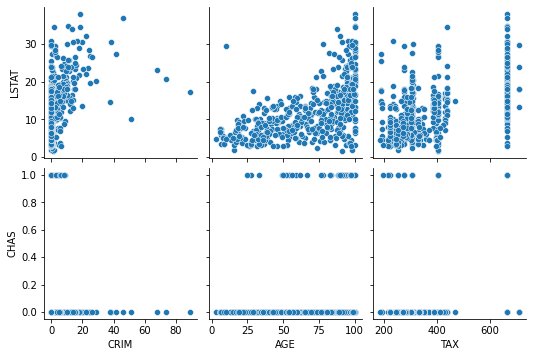

In [15]:
sns.pairplot(df ,
    x_vars=["CRIM", "AGE", "TAX"],
    y_vars=["LSTAT", "CHAS"],
        )

In [18]:
X = df
y= load_boston().target

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , random_state = 42)

In [19]:
from sklearn.model_selection import cross_val_score

def sc(model , X , y ):
    
    mse = cross_val_score(model , X , y , scoring = "neg_mean_squared_error" , cv = 5)
    
    return mse , np.mean(mse)
    

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

li_mse , li_mean = sc(model , X_train , y_train)




In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

In [47]:
from sklearn.model_selection import GridSearchCV   # used for hyperparameter tuning      , Not mandatory

param_grid = {'alpha': [1e-40, 5e-15,1e-5,0.001, 0.01, 0.1, 1, 10, 20 , 30 , 50 ,  100, 1000] }

ridge_model_hyper = GridSearchCV(ridge_model, param_grid , cv=5 , scoring='neg_mean_squared_error')

ridge_model_hyper.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-40, 5e-15, 1e-05, 0.001, 0.01, 0.1, 1, 10,
                                   20, 30, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [48]:
ridge_model_hyper.score(X_test, y_test)

-21.51744423117727

In [49]:
ridge_model_hyper.best_score_ , ridge_model_hyper.best_params_

(-25.977777430926313, {'alpha': 1e-40})

In [33]:
li_mean



-25.9777774309264

In [53]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

from sklearn.model_selection import GridSearchCV   # used for hyperparameter tuning      , Not mandatory

param_grid = {'alpha': [0,0.1, 1, 10, 20 , 30 , 50 ,  100, 1000] }

lasso_hyper = GridSearchCV(lasso, param_grid , cv=5 , scoring='neg_mean_squared_error')

lasso_hyper.fit(X_train, y_train)

lasso_hyper.best_score_ , lasso_hyper.best_params_

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3163.9321366183317, tolerance: 2.4052331519434627
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_

(-25.977777430926277, {'alpha': 0})

In [62]:

y_pred =lasso_hyper.predict(X_test)

r2_score_r = r2_score(y_test, y_pred)

r2_score_r

0.7112260057484919

In [61]:
from sklearn.metrics import r2_score

In [63]:
y_pred =ridge_model_hyper.predict(X_test)


r2_score_l = r2_score(y_test, y_pred)

r2_score_l

0.7112260057484925